In [1]:
import warnings
warnings.filterwarnings("ignore")

# AdaBoost

## AdaBoostClassifier

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model,ensemble
from sklearn.model_selection import train_test_split
# 使用 scikit-learn 自带的 digits 数据集
digits=datasets.load_digits()
# 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,
                                    test_size=0.25,random_state=0,stratify=digits.target)


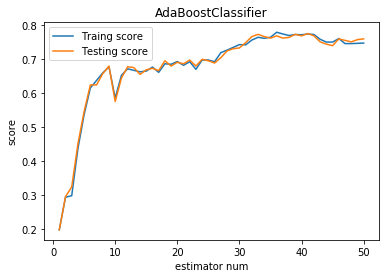

In [5]:
# 测试 AdaBoostClassifier 的用法，绘制 AdaBoostClassifier 的预测性能随基础分类器数量的影响
def test_AdaBoostClassifier(*data):
    X_train,X_test,y_train,y_test=data
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train,y_train)
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="Traing score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostClassifier")
    plt.show()
test_AdaBoostClassifier(X_train,X_test,y_train,y_test)

In [6]:
clf=ensemble.AdaBoostClassifier(learning_rate=0.1)
??clf

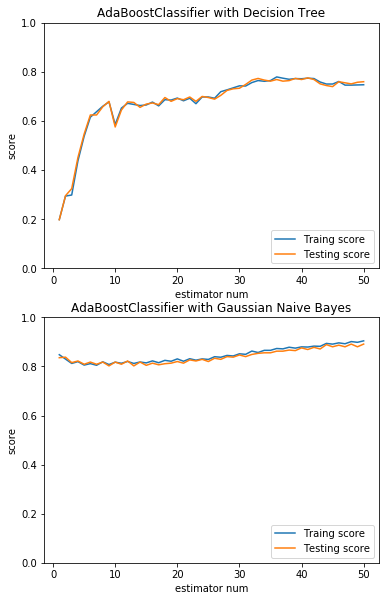

In [15]:
# 测试AdaBoostClassifier 的预测性能随基础分类器数量和基础分类器的类型的影响
def test_AdaBoostClassifier_base_classifier(*data):
    from sklearn.naive_bayes import GaussianNB
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(2,1,1)
    # 默认的个体分类器
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train,y_train)
    # 绘图
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="Traing score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Decision Tree")
    ## Gaussian Naive Bayes 个体分类器
    ax=fig.add_subplot(2,1,2)
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1,base_estimator=GaussianNB())
    clf.fit(X_train,y_train)
    # 绘图
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="Traing score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Gaussian Naive Bayes")
    plt.subplots_adjust(top=2)
    plt.show()
test_AdaBoostClassifier_base_classifier(X_train,X_test,y_train,y_test)

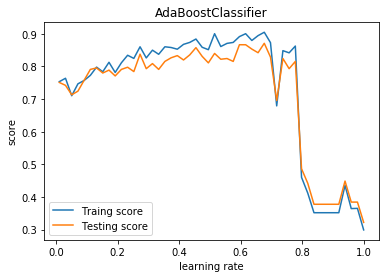

In [16]:
# 测试AdaBoostClassifier 的预测性能随学习率的影响
def test_AdaBoostClassifier_learning_rate(*data):
    X_train,X_test,y_train,y_test=data
    learning_rates=np.linspace(0.01,1)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    traing_scores=[]
    testing_scores=[]
    for learning_rate in learning_rates:
        clf=ensemble.AdaBoostClassifier(learning_rate=learning_rate,n_estimators=500)
        clf.fit(X_train,y_train)
        traing_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(learning_rates,traing_scores,label="Traing score")
    ax.plot(learning_rates,testing_scores,label="Testing score")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostClassifier")
    plt.show()
test_AdaBoostClassifier_learning_rate(X_train,X_test,y_train,y_test)

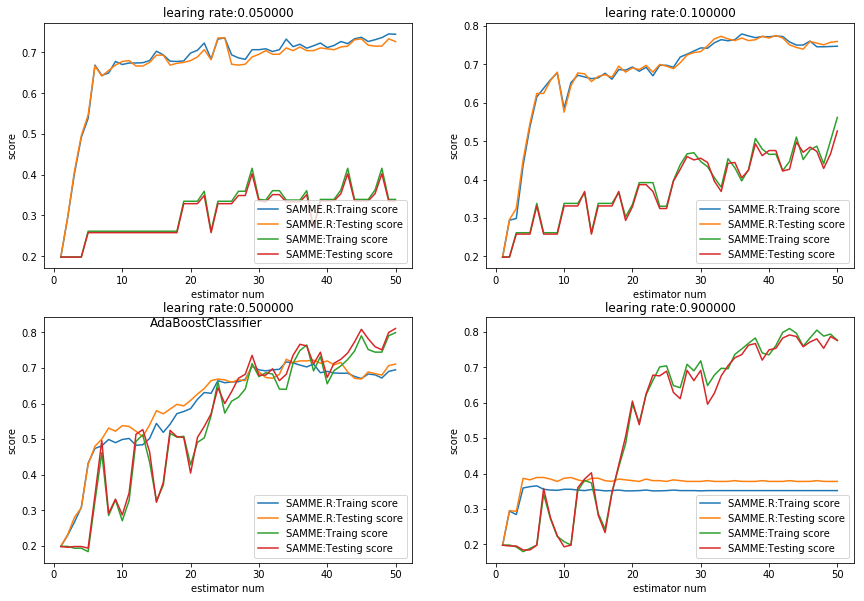

In [19]:
# 测试AdaBoostClassifier的预测性能随学习率和algorithm 参数的影响
def test_AdaBoostClassifier_algorithm(*data):
    X_train,X_test,y_train,y_test=data
    algorithms=['SAMME.R','SAMME']
    fig=plt.figure()
    learning_rates=[0.05,0.1,0.5,0.9]
    for i,learning_rate in enumerate(learning_rates):
        ax=fig.add_subplot(2,2,i+1)
        for i ,algorithm in enumerate(algorithms):
            clf=ensemble.AdaBoostClassifier(learning_rate=learning_rate,
				algorithm=algorithm)
            clf.fit(X_train,y_train)
            ## 绘图
            estimators_num=len(clf.estimators_)
            X=range(1,estimators_num+1)
            ax.plot(list(X),list(clf.staged_score(X_train,y_train)),
				label="%s:Traing score"%algorithms[i])
            ax.plot(list(X),list(clf.staged_score(X_test,y_test)),
				label="%s:Testing score"%algorithms[i])
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_title("learing rate:%f"%learning_rate)
    fig.suptitle("AdaBoostClassifier")
    plt.subplots_adjust(right=2,top=2)
    plt.show()
test_AdaBoostClassifier_algorithm(X_train,X_test,y_train,y_test)

## AdaBoostRegressor

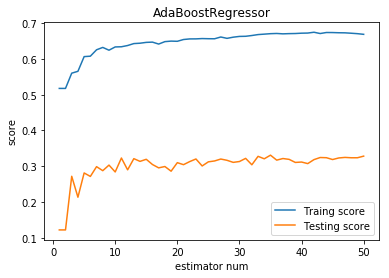

In [22]:
# 使用 scikit-learn 自带的 digits 数据集
diabetes=datasets.load_diabetes()
# 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test=train_test_split(diabetes.data,diabetes.target,
                                                test_size=0.25,random_state=0)
# 测试 AdaBoostRegressor 的用法，绘制 AdaBoostRegressor 的预测性能随基础回归器数量的影响
def test_AdaBoostRegressor(*data):
    X_train,X_test,y_train,y_test=data
    regr=ensemble.AdaBoostRegressor()
    regr.fit(X_train,y_train)
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    estimators_num=len(regr.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(regr.staged_score(X_train,y_train)),label="Traing score")
    ax.plot(list(X),list(regr.staged_score(X_test,y_test)),label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostRegressor")
    plt.show()
test_AdaBoostRegressor(X_train,X_test,y_train,y_test)

In [23]:
regr=ensemble.AdaBoostRegressor()
??regr

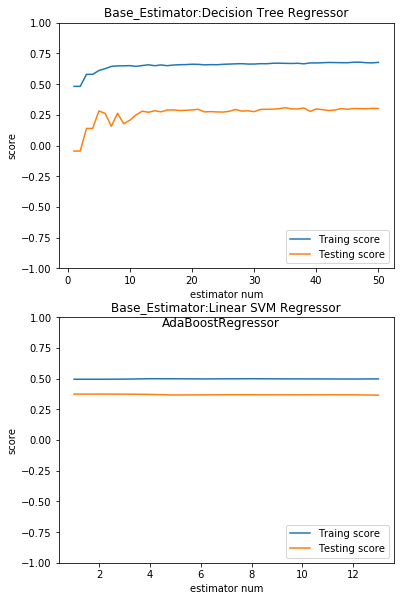

In [25]:
# 测试 AdaBoostRegressor 的预测性能随基础回归器数量的和基础回归器类型的影响
def test_AdaBoostRegressor_base_regr(*data):
    from sklearn.svm import  LinearSVR
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    regrs=[ensemble.AdaBoostRegressor(), # 基础回归器为默认类型
		ensemble.AdaBoostRegressor(base_estimator=LinearSVR(epsilon=0.01,C=100))] # 基础回归器为 LinearSVR
    labels=["Decision Tree Regressor","Linear SVM Regressor"]
    for i ,regr in enumerate(regrs):
        ax=fig.add_subplot(2,1,i+1)
        regr.fit(X_train,y_train)
        ## 绘图
        estimators_num=len(regr.estimators_)
        X=range(1,estimators_num+1)
        ax.plot(list(X),list(regr.staged_score(X_train,y_train)),label="Traing score")
        ax.plot(list(X),list(regr.staged_score(X_test,y_test)),label="Testing score")
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_ylim(-1,1)
        ax.set_title("Base_Estimator:%s"%labels[i])
    plt.subplots_adjust(top=2)
    plt.suptitle("AdaBoostRegressor")
    plt.show()
test_AdaBoostRegressor_base_regr(X_train,X_test,y_train,y_test)

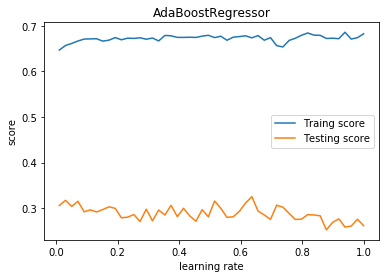

In [26]:
# 测试 AdaBoostRegressor 的预测性能随学习率的影响
def test_AdaBoostRegressor_learning_rate(*data):
    X_train,X_test,y_train,y_test=data
    learning_rates=np.linspace(0.01,1)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    traing_scores=[]
    testing_scores=[]
    for learning_rate in learning_rates:
        regr=ensemble.AdaBoostRegressor(learning_rate=learning_rate,n_estimators=500)
        regr.fit(X_train,y_train)
        traing_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(learning_rates,traing_scores,label="Traing score")
    ax.plot(learning_rates,testing_scores,label="Testing score")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostRegressor")
    plt.show()
test_AdaBoostRegressor_learning_rate(X_train,X_test,y_train,y_test)

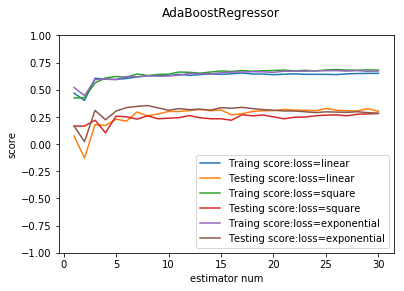

In [27]:
# 测试 AdaBoostRegressor 的预测性能随损失函数类型的影响
def test_AdaBoostRegressor_loss(*data):
    X_train,X_test,y_train,y_test=data
    losses=['linear','square','exponential']
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    for i ,loss in enumerate(losses):
        regr=ensemble.AdaBoostRegressor(loss=loss,n_estimators=30)
        regr.fit(X_train,y_train)
        ## 绘图
        estimators_num=len(regr.estimators_)
        X=range(1,estimators_num+1)
        ax.plot(list(X),list(regr.staged_score(X_train,y_train)),
			label="Traing score:loss=%s"%loss)
        ax.plot(list(X),list(regr.staged_score(X_test,y_test)),
			label="Testing score:loss=%s"%loss)
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_ylim(-1,1)
    plt.suptitle("AdaBoostRegressor")
    plt.show()
test_AdaBoostRegressor_loss(X_train,X_test,y_train,y_test)

# Gradient Tree Boosting

## GradientBoostingClassifier

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model,ensemble
from sklearn.model_selection import train_test_split
# 使用 scikit-learn 自带的 digits 数据集
digits=datasets.load_digits()
# 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,
                                    test_size=0.25,random_state=0,stratify=digits.target)
# 测试 GradientBoostingClassifier 的用法
def test_GradientBoostingClassifier(*data):
    X_train,X_test,y_train,y_test=data
    clf=ensemble.GradientBoostingClassifier()
    clf.fit(X_train,y_train)
    print("Traing Score:%f"%clf.score(X_train,y_train))
    print("Testing Score:%f"%clf.score(X_test,y_test))
test_GradientBoostingClassifier(X_train,X_test,y_train,y_test)

Traing Score:1.000000
Testing Score:0.960000


In [32]:
clf=ensemble.GradientBoostingClassifier()
??clf

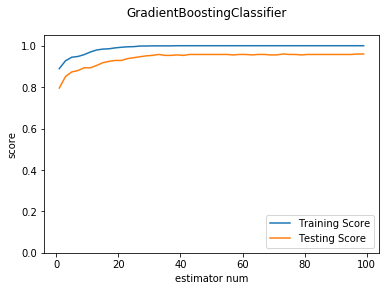

In [33]:
# 测试 GradientBoostingClassifier 的预测性能随 n_estimators 参数的影响
def test_GradientBoostingClassifier_num(*data):
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,100,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        clf=ensemble.GradientBoostingClassifier(n_estimators=num)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()
test_GradientBoostingClassifier_num(X_train,X_test,y_train,y_test)

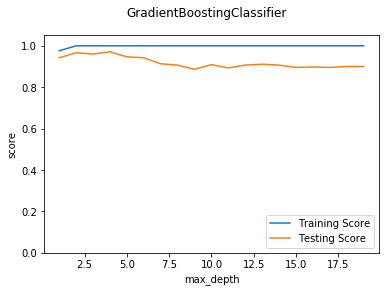

In [34]:
# 测试 GradientBoostingClassifier 的预测性能随 max_depth 参数的影响
def test_GradientBoostingClassifier_maxdepth(*data):
    X_train,X_test,y_train,y_test=data
    maxdepths=np.arange(1,20)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for maxdepth in maxdepths:
        clf=ensemble.GradientBoostingClassifier(max_depth=maxdepth,max_leaf_nodes=None)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(maxdepths,training_scores,label="Training Score")
    ax.plot(maxdepths,testing_scores,label="Testing Score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()
test_GradientBoostingClassifier_maxdepth(X_train,X_test,y_train,y_test)

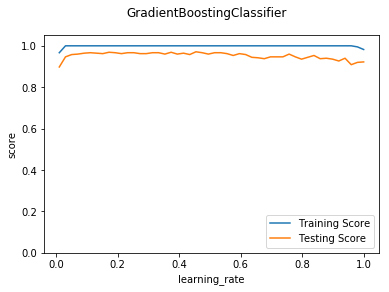

In [35]:
# 测试 GradientBoostingClassifier 的预测性能随学习率参数的影响
def test_GradientBoostingClassifier_learning(*data):
    X_train,X_test,y_train,y_test=data
    learnings=np.linspace(0.01,1.0)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for learning in learnings:
        clf=ensemble.GradientBoostingClassifier(learning_rate=learning)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(learnings,training_scores,label="Training Score")
    ax.plot(learnings,testing_scores,label="Testing Score")
    ax.set_xlabel("learning_rate")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()
test_GradientBoostingClassifier_learning(X_train,X_test,y_train,y_test)

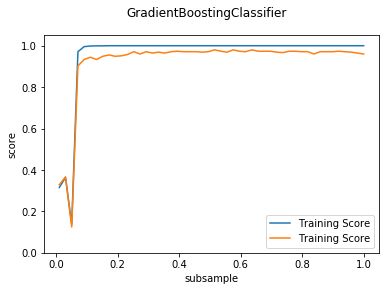

In [36]:
# 测试 GradientBoostingClassifier 的预测性能随 subsample 参数的影响
def test_GradientBoostingClassifier_subsample(*data):
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    subsamples=np.linspace(0.01,1.0)
    testing_scores=[]
    training_scores=[]
    for subsample in subsamples:
            clf=ensemble.GradientBoostingClassifier(subsample=subsample)
            clf.fit(X_train,y_train)
            training_scores.append(clf.score(X_train,y_train))
            testing_scores.append(clf.score(X_test,y_test))
    ax.plot(subsamples,training_scores,label="Training Score")
    ax.plot(subsamples,testing_scores,label="Training Score")
    ax.set_xlabel("subsample")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()
test_GradientBoostingClassifier_subsample(X_train,X_test,y_train,y_test)

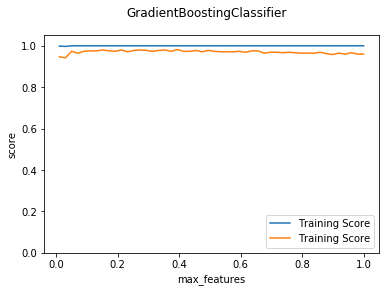

In [37]:
# 测试 GradientBoostingClassifier 的预测性能随 max_features 参数的影响
def test_GradientBoostingClassifier_max_features(*data):
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    max_features=np.linspace(0.01,1.0)
    testing_scores=[]
    training_scores=[]
    for features in max_features:
            clf=ensemble.GradientBoostingClassifier(max_features=features)
            clf.fit(X_train,y_train)
            training_scores.append(clf.score(X_train,y_train))
            testing_scores.append(clf.score(X_test,y_test))
    ax.plot(max_features,training_scores,label="Training Score")
    ax.plot(max_features,testing_scores,label="Training Score")
    ax.set_xlabel("max_features")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()
test_GradientBoostingClassifier_max_features(X_train,X_test,y_train,y_test)

## GradientBoostingRegressor

In [38]:
# 使用 scikit-learn 自带的 digits 数据集
diabetes=datasets.load_diabetes()
# 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test=train_test_split(diabetes.data,diabetes.target,
                                                test_size=0.25,random_state=0)
# 测试 GradientBoostingRegressor 的用法
def test_GradientBoostingRegressor(*data):
    X_train,X_test,y_train,y_test=data
    regr=ensemble.GradientBoostingRegressor()
    regr.fit(X_train,y_train)
    print("Training score:%f"%regr.score(X_train,y_train))
    print("Testing score:%f"%regr.score(X_test,y_test))
test_GradientBoostingRegressor(X_train,X_test,y_train,y_test)

Training score:0.878471
Testing score:0.220463


In [39]:
regr=ensemble.GradientBoostingRegressor()
??regr

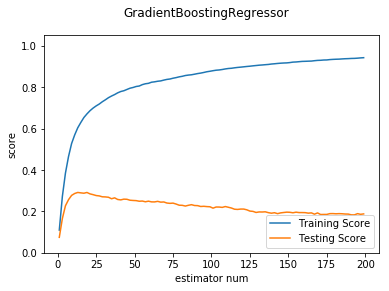

In [40]:
# 测试 GradientBoostingRegressor 的预测性能随 n_estimators 参数的影响
def test_GradientBoostingRegressor_num(*data):
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,200,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        regr=ensemble.GradientBoostingRegressor(n_estimators=num)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()
test_GradientBoostingRegressor_num(X_train,X_test,y_train,y_test)

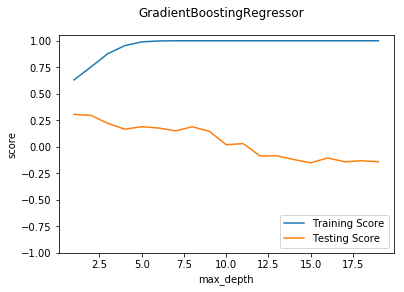

In [41]:
# 测试 GradientBoostingRegressor 的预测性能随 max_depth 参数的影响
def test_GradientBoostingRegressor_maxdepth(*data):
    X_train,X_test,y_train,y_test=data
    maxdepths=np.arange(1,20)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for maxdepth in maxdepths:
        regr=ensemble.GradientBoostingRegressor(max_depth=maxdepth,max_leaf_nodes=None)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(maxdepths,training_scores,label="Training Score")
    ax.plot(maxdepths,testing_scores,label="Testing Score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1.05)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()
test_GradientBoostingRegressor_maxdepth(X_train,X_test,y_train,y_test)

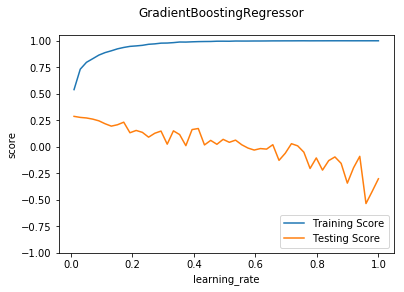

In [42]:
# 测试 GradientBoostingRegressor 的预测性能随 learning_rate 参数的影响
def test_GradientBoostingRegressor_learning(*data):
    X_train,X_test,y_train,y_test=data
    learnings=np.linspace(0.01,1.0)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for learning in learnings:
        regr=ensemble.GradientBoostingRegressor(learning_rate=learning)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(learnings,training_scores,label="Training Score")
    ax.plot(learnings,testing_scores,label="Testing Score")
    ax.set_xlabel("learning_rate")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1.05)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()
test_GradientBoostingRegressor_learning(X_train,X_test,y_train,y_test)

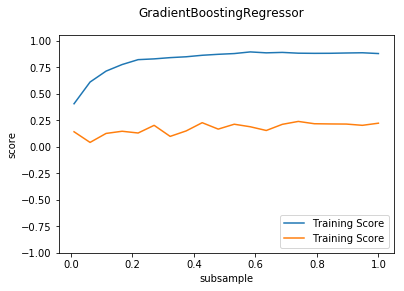

In [43]:
# 测试 GradientBoostingRegressor 的预测性能随 subsample 参数的影响
def test_GradientBoostingRegressor_subsample(*data):
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    subsamples=np.linspace(0.01,1.0,num=20)
    testing_scores=[]
    training_scores=[]
    for subsample in subsamples:
            regr=ensemble.GradientBoostingRegressor(subsample=subsample)
            regr.fit(X_train,y_train)
            training_scores.append(regr.score(X_train,y_train))
            testing_scores.append(regr.score(X_test,y_test))
    ax.plot(subsamples,training_scores,label="Training Score")
    ax.plot(subsamples,testing_scores,label="Training Score")
    ax.set_xlabel("subsample")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1.05)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()
test_GradientBoostingRegressor_subsample(X_train,X_test,y_train,y_test)

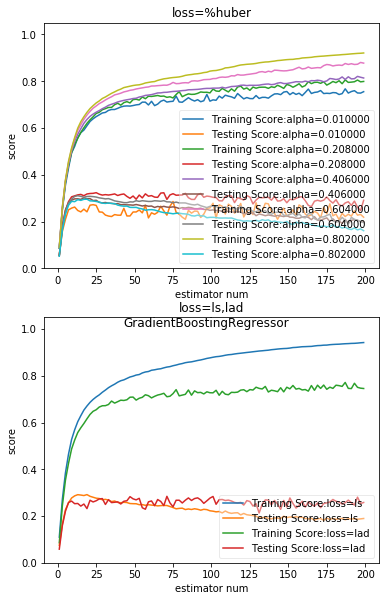

In [46]:
# 测试 GradientBoostingRegressor 的预测性能随不同的损失函数和 alpha 参数的影响
def test_GradientBoostingRegressor_loss(*data):
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    nums=np.arange(1,200,step=2)
    ########## 绘制 huber ######
    ax=fig.add_subplot(2,1,1)
    alphas=np.linspace(0.01,1.0,endpoint=False,num=5)
    for alpha in alphas:
            testing_scores=[]
            training_scores=[]
            for num in nums:
                    regr=ensemble.GradientBoostingRegressor(n_estimators=num,
					loss='huber',alpha=alpha)
                    regr.fit(X_train,y_train)
                    training_scores.append(regr.score(X_train,y_train))
                    testing_scores.append(regr.score(X_test,y_test))
            ax.plot(nums,training_scores,label="Training Score:alpha=%f"%alpha)
            ax.plot(nums,testing_scores,label="Testing Score:alpha=%f"%alpha)
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right",framealpha=0.4)
    ax.set_ylim(0,1.05)
    ax.set_title("loss=%huber")
    plt.suptitle("GradientBoostingRegressor")
    #### 绘制 ls  和 lad
    ax=fig.add_subplot(2,1,2)
    for loss in ['ls','lad']:
        testing_scores=[]
        training_scores=[]
        for num in nums:
                regr=ensemble.GradientBoostingRegressor(n_estimators=num,loss=loss)
                regr.fit(X_train,y_train)
                training_scores.append(regr.score(X_train,y_train))
                testing_scores.append(regr.score(X_test,y_test))
        ax.plot(nums,training_scores,label="Training Score:loss=%s"%loss)
        ax.plot(nums,testing_scores,label="Testing Score:loss=%s"%loss)
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right",framealpha=0.4)
    ax.set_ylim(0,1.05)
    ax.set_title("loss=ls,lad")
    plt.subplots_adjust(top=2)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()
test_GradientBoostingRegressor_loss(X_train,X_test,y_train,y_test)

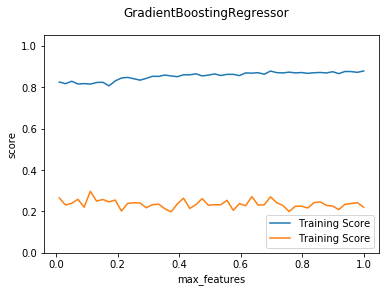

In [45]:
# 测试 GradientBoostingRegressor 的预测性能随 max_features 参数的影响
def test_GradientBoostingRegressor_max_features(*data):
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    max_features=np.linspace(0.01,1.0)
    testing_scores=[]
    training_scores=[]
    for features in max_features:
            regr=ensemble.GradientBoostingRegressor(max_features=features)
            regr.fit(X_train,y_train)
            training_scores.append(regr.score(X_train,y_train))
            testing_scores.append(regr.score(X_test,y_test))
    ax.plot(max_features,training_scores,label="Training Score")
    ax.plot(max_features,testing_scores,label="Training Score")
    ax.set_xlabel("max_features")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()
test_GradientBoostingRegressor_max_features(X_train,X_test,y_train,y_test)

# Random Forest

## RandomForestClassifier

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model,ensemble
from sklearn.model_selection import train_test_split
# 使用 scikit-learn 自带的 digits 数据集
digits=datasets.load_digits()
# 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,
                                    test_size=0.25,random_state=0,stratify=digits.target)
# 测试 RandomForestClassifier 的用法
def test_RandomForestClassifier(*data):
    X_train,X_test,y_train,y_test=data
    clf=ensemble.RandomForestClassifier()
    clf.fit(X_train,y_train)
    print("Traing Score:%f"%clf.score(X_train,y_train))
    print("Testing Score:%f"%clf.score(X_test,y_test))
test_RandomForestClassifier(X_train,X_test,y_train,y_test)

Traing Score:0.999258
Testing Score:0.948889


In [48]:
clf=ensemble.RandomForestClassifier()
??clf

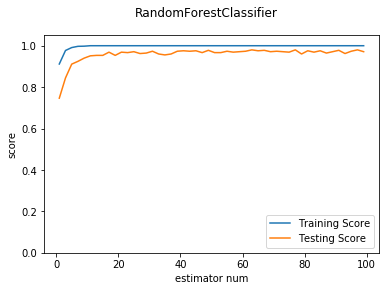

In [50]:
# 测试 RandomForestClassifier 的预测性能随 n_estimators 参数的影响
def test_RandomForestClassifier_num(*data):
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,100,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        clf=ensemble.RandomForestClassifier(n_estimators=num)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestClassifier")
    plt.show()
test_RandomForestClassifier_num(X_train,X_test,y_train,y_test)

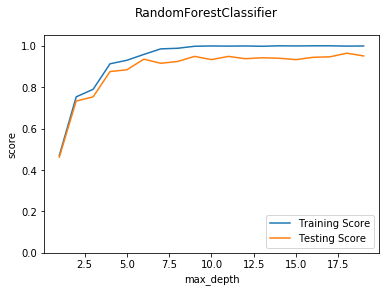

In [49]:
# 测试 RandomForestClassifier 的预测性能随 max_depth 参数的影响
def test_RandomForestClassifier_max_depth(*data):
    X_train,X_test,y_train,y_test=data
    maxdepths=range(1,20)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for max_depth in maxdepths:
        clf=ensemble.RandomForestClassifier(max_depth=max_depth)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(maxdepths,training_scores,label="Training Score")
    ax.plot(maxdepths,testing_scores,label="Testing Score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestClassifier")
    plt.show()
test_RandomForestClassifier_max_depth(X_train,X_test,y_train,y_test)

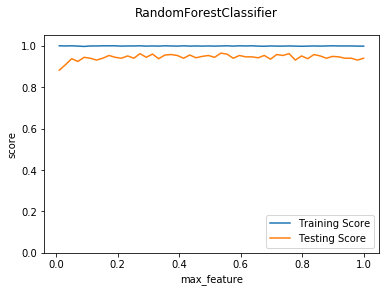

In [51]:
# 测试 RandomForestClassifier 的预测性能随 max_features 参数的影响
def test_RandomForestClassifier_max_features(*data):
    X_train,X_test,y_train,y_test=data
    max_features=np.linspace(0.01,1.0)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for max_feature in max_features:
        clf=ensemble.RandomForestClassifier(max_features=max_feature)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(max_features,training_scores,label="Training Score")
    ax.plot(max_features,testing_scores,label="Testing Score")
    ax.set_xlabel("max_feature")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestClassifier")
    plt.show()
test_RandomForestClassifier_max_features(X_train,X_test,y_train,y_test)

## RandomForestRegressor

In [52]:
# 使用 scikit-learn 自带的 digits 数据集
diabetes=datasets.load_diabetes()
# 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test=train_test_split(diabetes.data,diabetes.target,
                                                test_size=0.25,random_state=0)
# 测试 RandomForestRegressor 的用法
def test_RandomForestRegressor(*data):
    X_train,X_test,y_train,y_test=data
    regr=ensemble.RandomForestRegressor()
    regr.fit(X_train,y_train)
    print("Traing Score:%f"%regr.score(X_train,y_train))
    print("Testing Score:%f"%regr.score(X_test,y_test))
test_RandomForestRegressor(X_train,X_test,y_train,y_test)

Traing Score:0.903336
Testing Score:0.194192


In [53]:
regr=ensemble.RandomForestRegressor()
??regr

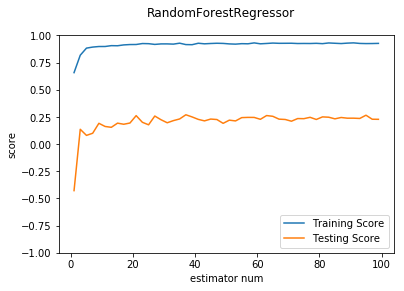

In [55]:
#  测试 RandomForestRegressor 的预测性能随  n_estimators 参数的影响
def test_RandomForestRegressor_num(*data):
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,100,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        regr=ensemble.RandomForestRegressor(n_estimators=num)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1)
    plt.suptitle("RandomForestRegressor")
    plt.show()
test_RandomForestRegressor_num(X_train,X_test,y_train,y_test)

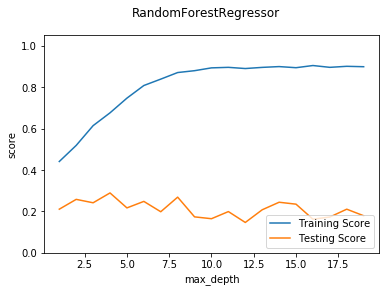

In [56]:
# 测试 RandomForestRegressor 的预测性能随  max_depth 参数的影响
def test_RandomForestRegressor_max_depth(*data):
    X_train,X_test,y_train,y_test=data
    maxdepths=range(1,20)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for max_depth in maxdepths:
        regr=ensemble.RandomForestRegressor(max_depth=max_depth)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(maxdepths,training_scores,label="Training Score")
    ax.plot(maxdepths,testing_scores,label="Testing Score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestRegressor")
    plt.show()
test_RandomForestRegressor_max_depth(X_train,X_test,y_train,y_test)

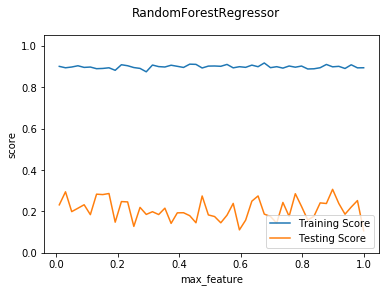

In [57]:
# 测试 RandomForestRegressor 的预测性能随  max_features 参数的影响
def test_RandomForestRegressor_max_features(*data):
    X_train,X_test,y_train,y_test=data
    max_features=np.linspace(0.01,1.0)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for max_feature in max_features:
        regr=ensemble.RandomForestRegressor(max_features=max_feature)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(max_features,training_scores,label="Training Score")
    ax.plot(max_features,testing_scores,label="Testing Score")
    ax.set_xlabel("max_feature")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestRegressor")
    plt.show()
test_RandomForestRegressor_max_features(X_train,X_test,y_train,y_test)